In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1. Loading and Cleaning Data

In [2]:
df = pd.read_csv("dwell_weather_edited.csv", index_col = "Unnamed: 0")

In [3]:
df.head()

,Day Type,Day Part,Avg Trip Time (min),Month,Year,Month.1,Day,Time,Check_Flag,Average of temp,Average of feels_like,Average of temp_min,Average of temp_max,Average of pressure,Average of humidity,Sum of rain_1h,Average of wind_speed,Average of wind_gust
0,0: All Days (M-Su),05: 4am (4am-5am),20.900000,May,19.0,5.0,0.0,4.0,19504,44.160541,41.684054,41.785135,47.123514,1013.972973,80.459459,8.33,4.962162,8.444483
1,0: All Days (M-Su),10: 9am (9am-10am),27.066667,May,19.0,5.0,0.0,9.0,19509,42.815676,39.944324,40.171351,45.736216,1013.216216,83.162162,6.70,5.323243,8.185625
2,0: All Days (M-Su),11: 10am (10am-11am),14.066667,May,19.0,5.0,0.0,10.0,195010,42.677429,39.514571,39.947143,45.499429,1014.457143,83.885714,6.07,5.592286,10.117692
3,0: All Days (M-Su),12: 11am (11am-12noon),20.900000,May,19.0,5.0,0.0,11.0,195011,44.346970,41.048182,42.161515,47.028182,1014.696970,79.393939,6.22,6.637273,10.064839
4,0: All Days (M-Su),13: 12pm (12noon-1pm),9.966667,May,19.0,5.0,0.0,12.0,195012,46.348750,43.662500,44.130000,49.299063,1014.937500,76.593750,4.51,6.826875,10.668000


### 1.1 Data Cleaning

In [4]:
# df["Month.1"].unique()

In [5]:
# df["is_summer"] = 0

In [6]:
# for i in range(0, len(df)):
#     if df.loc[i, "Month.1"] in [6,7,8]:
#         df.loc[i, "is_summer"] =1

In [7]:
df["Day Type"].unique()

array(['0: All Days (M-Su)', '1: Monday (M-M)', '2: Tuesday (Tu-Tu)',
       '3: Wednesday (W-W)', '4: Thursday (Th-Th)', '6: Saturday (Sa-Sa)',
       '7: Sunday (Su-Su)', '5: Friday (F-F)'], dtype=object)

In [8]:
df["Tuesday"] = 0
df["Wednesday"] = 0
df["Thursday"] =0 
df["Friday"] =0 
df["Saturday"] = 0 
df["Sunday"] = 0

In [9]:
for i in range(0, len(df)):
    if df.loc[i, "Day Type"] == '7: Sunday (Su-Su)':
        df.loc[i, "Sunday"] =1
    elif df.loc[i, "Day Type"] == '2: Tuesday (Tu-Tu)':
        df.loc[i, "Tuesday"] = 1
    elif df.loc[i, "Day Type"] == '3: Wednesday (W-W)':
        df.loc[i, "Wednesday"] = 1
    elif df.loc[i, "Day Type"] == '4: Thursday (Th-Th)':
        df.loc[i, "Thursday"] = 1
    elif df.loc[i, "Day Type"] == '5: Friday (F-F)':
        df.loc[i, "Friday"] = 1
    elif df.loc[i, "Day Type"] == '6: Saturday (Sa-Sa)':
        df.loc[i, "Saturday"] = 1

In [10]:
drop_list = ["Day Type", "Day Part", "Month", "Check_Flag", "Day", "Average of feels_like",
             "Average of temp_min", "Average of temp_max", "Average of wind_speed"]

In [11]:
df = df.drop(drop_list, axis=1)

In [12]:
# df["Time"] #I'm going to leave time for now....

In [13]:
#Find and replace NaN values:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

In [14]:
rows_with_NaN #all good!

,Avg Trip Time (min),Year,Month.1,Time,Average of temp,Average of pressure,Average of humidity,Sum of rain_1h,Average of wind_gust,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday


In [15]:
to_drop = [i for i in range(0, len(df)) if (df.loc[i, "Avg Trip Time (min)"] > 60 or df.loc[i, "Avg Trip Time (min)" ] < 5)]

In [16]:
df = df.drop(to_drop, axis=0).reset_index(drop=True)

### 1.2 Checking y-range

In [17]:
print(min(df["Avg Trip Time (min)"]))
print(np.mean(df["Avg Trip Time (min)"]))
print(max(df["Avg Trip Time (min)"]))

5.0
23.809308692579044
60.0


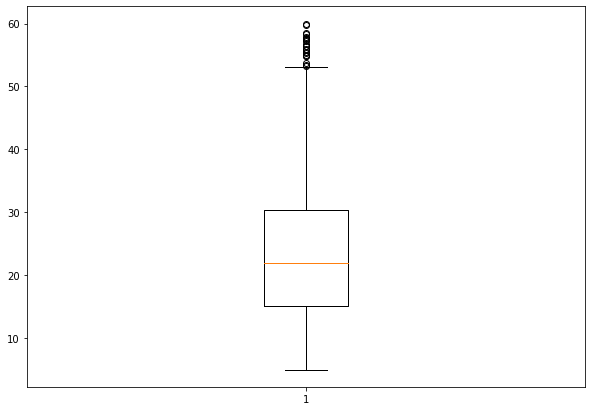

In [18]:
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(df["Avg Trip Time (min)"])
# show plot
plt.show()

### 1.3 Data Splitting

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
columns_for_modeling = [i for i in df.columns if i != "Avg Trip Time (min)"]

In [21]:
#Main split for training and splitting:
x_train, x_test, y_train, y_test = train_test_split(df[columns_for_modeling], df["Avg Trip Time (min)"], test_size=0.33)

In [22]:
#Second split for parameter tuning:
x_train_1, x_test_val, y_train_1, y_test_val = train_test_split(x_train, y_train, test_size=0.33)

In [23]:
x_train_1.columns

Index(['Year', 'Month.1', 'Time', 'Average of temp', 'Average of pressure',
       'Average of humidity', 'Sum of rain_1h', 'Average of wind_gust',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object')

# 2.  Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV

### 2.1 Linear

In [25]:
reg = LinearRegression().fit(x_train, y_train)

In [26]:
reg.score(x_train, y_train)

0.05317036982276413

In [27]:
pred  = reg.predict(x_test)

In [28]:
mean_squared_error(pred, y_test, squared = False)

11.07497344471895

In [29]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [30]:
import statsmodels.api as sm
from scipy import stats

In [31]:
est = sm.OLS(y_train, x_train)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Avg Trip Time (min)   R-squared (uncentered):                   0.821
Model:                             OLS   Adj. R-squared (uncentered):              0.818
Method:                  Least Squares   F-statistic:                              315.2
Date:                 Tue, 05 Apr 2022   Prob (F-statistic):                        0.00
Time:                         20:41:52   Log-Likelihood:                         -3752.2
No. Observations:                  978   AIC:                                      7532.
Df Residuals:                      964   BIC:                                      7601.
Df Model:                           14                                                  
Covariance Type:             nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [32]:
pred = est2.predict(x_test)

In [ ]:
mean_squared_error(pred, y_test, squared = False)

### 2.2 Ridge

In [ ]:
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)

In [ ]:
pred = model.predict(x_test)

In [ ]:
mean_squared_error(pred, y_test, squared = False)

### 2.2.1 Optimal alpha for Ridge

In [ ]:
alphas = np.linspace(0,.5,11)

In [ ]:
fits = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(x_train_1, y_train_1)
    pred = model.predict(x_test_val)
    test_pred = model.predict(x_train_1)
    res = [mean_squared_error(pred, y_test_val, squared = False),mean_squared_error(test_pred, y_train_1, squared = False)]
    fits.append(res)

In [ ]:
val_scores = [i[0] for i in fits]
train_scores = [i[1] for i in fits]

fig, ax = plt.subplots()
ax.set_xlabel("Tree Depth")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Tree Depth for Training and Vaidation Sets")
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

#Nothing interesting, rip

### 2.2.2 RidgeCV

In [ ]:
model = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x_train, y_train)

In [ ]:
pred = model.predict(x_test)

In [ ]:
mean_squared_error(pred, y_test, squared = False)

### 2.3 Lasso

In [ ]:
model = Lasso().fit(x_train, y_train)

In [ ]:
pred = model.predict(x_test)

In [ ]:
mean_squared_error(pred, y_test, squared = False)

# 3. Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
regr = make_pipeline(StandardScaler(), SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1))

In [ ]:
regr.fit(x_train, y_train)

In [ ]:
pred = regr.predict(x_test)

In [ ]:
mean_squared_error(y_test, pred, squared=False)

### 3.2 RBF Kernal

In [ ]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(x_train, y_train)
pred_rbf = svr_rbf.predict(x_test)
mean_squared_error(y_test, pred_rbf, squared=False)

### 3.3 Linear Kernal

In [ ]:
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_lin.fit(x_train, y_train)
pred_lin = svr_lin.predict(x_test)
mean_squared_error(y_test, pred_lin, squared=False)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Most basic model:
regr = RandomForestRegressor(random_state=0)
regr.fit(x_train, y_train)

In [ ]:
pred = regr.predict(x_test)

In [ ]:
mean_squared_error(pred, y_test, squared = False)

In [ ]:
#Most basic model:
regr_1 = RandomForestRegressor(random_state=0, criterion="mae")
regr_1.fit(x_train, y_train)

In [ ]:
pred_1 = regr_1.predict(x_test)

In [ ]:
mean_squared_error(pred_1, y_test, squared = False)

### 4.2 Fitting for Max Depth

In [ ]:
fits = []
max_depth = [i for i in range(2, 20)]
322.52
for depth in max_depth:
    fit = RandomForestRegressor(max_depth=depth)
    fit.fit(x_train_1, y_train_1)
    res = [mean_squared_error(fit.predict(x_train_1), y_train_1, squared = False), mean_squared_error(fit.predict(x_test_val), y_test_val, squared = False)]
    fits.append(res)

In [ ]:
train_scores = [i[0] for i in fits]
val_scores = [i[1] for i in fits]

fig, ax = plt.subplots()
ax.set_xlabel("Tree Depth")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Tree Depth for Training and Vaidation Sets")
ax.plot(max_depth, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(max_depth, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
fits = []
max_depth = [i for i in range(2, 20)]
322.52
for depth in max_depth:
    fit = RandomForestRegressor(max_depth=depth, criterion = 'mae')
    fit.fit(x_train_1, y_train_1)
    res = [mean_squared_error(fit.predict(x_train_1), y_train_1, squared = False), mean_squared_error(fit.predict(x_test_val), y_test_val, squared = False)]
    fits.append(res)

In [ ]:
train_scores = [i[0] for i in fits]
val_scores = [i[1] for i in fits]

fig, ax = plt.subplots()
ax.set_xlabel("Tree Depth")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Tree Depth for Training and Vaidation Sets")
ax.plot(max_depth, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(max_depth, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

### 4.3 Fitting for Number of Estimators

In [ ]:
fits = []
estimator_count = [i for i in range(50, 100)]

for est in estimator_count:
    fit = RandomForestRegressor(n_estimators=est)
    fit.fit(x_train_1, y_train_1)
    res = [mean_squared_error(fit.predict(x_train_1), y_train_1, squared = False), mean_squared_error(fit.predict(x_test_val), y_test_val, squared = False)]
    fits.append(res)

In [ ]:
train_scores = [i[0] for i in fits]
val_scores = [i[1] for i in fits]

fig, ax = plt.subplots()
ax.set_xlabel("Number of Estimators")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Number of Estimators for Training and Vaidation Sets")
ax.plot(estimator_count, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(estimator_count, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
fits = []
estimator_count = [i for i in range(50, 100)]

for est in estimator_count:
    fit = RandomForestRegressor(n_estimators=est, criterion= 'mae')
    fit.fit(x_train_1, y_train_1)
    res = [mean_squared_error(fit.predict(x_train_1), y_train_1, squared = False), mean_squared_error(fit.predict(x_test_val), y_test_val, squared = False)]
    fits.append(res)

In [ ]:
train_scores = [i[0] for i in fits]
val_scores = [i[1] for i in fits]

fig, ax = plt.subplots()
ax.set_xlabel("Number of Estimators")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Number of Estimators for Training and Vaidation Sets")
ax.plot(estimator_count, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(estimator_count, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

### 4.4 Fitting for ccp_alpha

In [ ]:
np.linspace(0,1,101)

In [ ]:
fits = []
alphas = np.linspace(0,1,11)

for alpha in alphas:
    fit = RandomForestRegressor(ccp_alpha=alpha)
    fit.fit(x_train_1, y_train_1)
    res = [mean_squared_error(fit.predict(x_train_1), y_train_1, squared = False), mean_squared_error(fit.predict(x_test_val), y_test_val, squared = False)]
    fits.append(res)

In [ ]:
train_scores = [i[0] for i in fits]
val_scores = [i[1] for i in fits]

fig, ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs ccp_alpha for Training and Vaidation Sets")
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
fits = []
alphas = np.linspace(0,1,11)

for alpha in alphas:
    fit = RandomForestRegressor(ccp_alpha=alpha, criterion = 'mae')
    fit.fit(x_train_1, y_train_1)
    res = [mean_squared_error(fit.predict(x_train_1), y_train_1, squared = False), mean_squared_error(fit.predict(x_test_val), y_test_val, squared = False)]
    fits.append(res)

In [ ]:
train_scores = [i[0] for i in fits]
val_scores = [i[1] for i in fits]

fig, ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs ccp_alpha for Training and Vaidation Sets")
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()